# PLS2 for proteomics and DTI data initial test run

In [2]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 10.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 12.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 7.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 6.8 MB/s eta 0:00:00:00:01


In [3]:
import pandas as pd

/var/folders/_0/pgrzqnfd5zj00cq9q5x3sbqm0000gn/T/ipykernel_86764/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
!pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.1/27.1 MB 12.5 MB/s eta 0:00:0000:0100:01


In [5]:
!pip install numpy
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 15.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 10.9 MB/s eta 0:00:0000:0100:01


In [7]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 2.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 11.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 kB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 9.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 3.2 MB/s eta 0:00:00


In [8]:
# Load relevant packages 
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

# Load relevant data for pilot test

In [10]:
# Check what's in directory
import os

current_directory = os.getcwd()

print(current_directory)

/Users/eleanorc_worklaptop/Desktop/UKB_Proteomics/UKB_PPP_python


In [11]:
proteomics = "/Users/eleanorc_worklaptop/Desktop/UKB_Proteomics/UKB_PPP_python/ST3_UKB_proteins.csv"
df_p_data = pd.read_csv(proteomics)
df_p_data

,UKBPPP ProteinID,Olink ID,Assay Target,Protein panel,Gene symbol,UniProt,Gene CHROM,Gene start,Gene end,Dilution factor,% of samples below LOD,Coefficient of variation (median %)
0,AARSD1:Q9BTE6:OID21311:v1,OID21311,AARSD1,Oncology,AARSD1,Q9BTE6,17,42950526,42964498,1:1,0.05%,4.78
1,ABHD14B:Q96IU4:OID20921:v1,OID20921,ABHD14B,Neurology,ABHD14B,Q96IU4,3,51968510,51983409,1:1,0.04%,8.97
2,ABL1:P00519:OID21280:v1,OID21280,ABL1,Oncology,ABL1,P00519,9,130713016,130887675,1:1,0.04%,6.03
3,ACAA1:P09110:OID21269:v1,OID21269,ACAA1,Oncology,ACAA1,P09110,3,38103129,38137242,1:1,17.20%,12.97
4,ACAN:P16112:OID20159:v1,OID20159,ACAN,Cardiometabolic,ACAN,P16112,15,88803436,88875353,1:10,0.13%,6.18
...,...,...,...,...,...,...,...,...,...,...,...,...
1467,XRCC4:Q13426:OID20869:v1,OID20869,XRCC4,Neurology,XRCC4,Q13426,5,83077498,83353787,1:1,80.94%,7.55
1468,YES1:P07947:OID21348:v1,OID21348,YES1,Oncology,YES1,P07947,18,721588,812546,1:1,0.04%,10.59
1469,YTHDF3:Q7Z739:OID20478:v1,OID20478,YTHDF3,Inflammation,YTHDF3,Q7Z739,8,63168553,63212786,1:1,10.88%,13.11
1470,ZBTB16:Q05516:OID21205:v1,OID21205,ZBTB16,Oncology,ZBTB16,Q05516,11,114059041,114256765,1:1,0.51%,8.49


In [12]:
# Load DTI data
neuroimaging_subset = "/Users/eleanorc_worklaptop/Desktop/UKB_Proteomics/UKB_PPP_python/merged_data.csv"

df_neuroimaging = pd.read_csv(neuroimaging_subset)

df_neuroimaging

,Unnamed: 0,eid,GZMB,GRPEL1,GSAP,GSTA1,GSTA3,GSTP1,GUCA2A,GUSB,...,lML_FA,rML_FA,lPTR_FA,rPTR_FA,lSLF_FA,rSLF_FA,lSTR_FA,rSTR_FA,lUnc_FA,rUnc_FA
0,1,1000573,0.18050,0.44505,0.3517,0.87555,0.59995,0.4293,0.13085,0.90860,...,0.425137,0.438404,0.477601,0.466786,0.486486,0.435698,0.434628,0.437619,0.414991,0.403708
1,2,1000893,0.88645,0.69160,0.6700,1.24515,0.67090,0.8054,0.22295,0.17655,...,0.407959,0.397717,0.445529,0.457740,0.453780,0.433911,0.409192,0.423134,0.378078,0.373331
2,3,1001028,1.37140,0.78770,2.0522,0.46210,0.73440,0.3075,0.71600,0.40510,...,0.410745,0.450009,0.477916,0.441603,0.451860,0.430216,0.422117,0.421530,0.376068,0.365023
3,4,1003537,0.57010,0.43875,0.3803,0.43135,0.28970,0.4099,0.00475,0.62660,...,0.430355,0.439236,0.491488,0.471265,0.450530,0.446036,0.429410,0.430935,0.412622,0.406120
4,5,1004616,1.19495,0.83780,0.2743,0.56105,0.31370,1.5987,0.33875,0.13995,...,0.410290,0.408738,0.474783,0.450130,0.447044,0.431624,0.451923,0.441271,0.368224,0.360642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,4640,6018609,0.00650,0.45365,0.4506,1.42485,1.10560,0.6354,0.66945,0.28730,...,0.463914,0.468890,0.445366,0.452633,0.430563,0.407339,0.427389,0.405904,0.363829,0.351309
4640,4641,6019358,0.49865,0.02620,0.5769,0.61225,0.49330,0.5430,0.55165,1.00795,...,0.420189,0.414230,0.451537,0.454354,0.427003,0.419351,0.419468,0.429952,0.370552,0.380164
4641,4642,6021143,0.10620,2.29245,0.1899,0.03165,0.36700,1.0386,0.13275,1.36590,...,0.413580,0.398320,0.468904,0.474296,0.457283,0.457668,0.439893,0.454022,0.429197,0.464371
4642,4643,6021217,0.02515,0.15630,0.4839,0.79975,4.44390,0.0259,0.15815,0.19085,...,0.432379,0.425174,0.444384,0.479776,0.454680,0.449540,0.431674,0.433359,0.397299,0.383125


In [14]:
# Tidy this df
df_neuroimaging.drop(columns=['eid'], inplace=True)
df_neuroimaging.head()

,Unnamed: 0,GZMB,GRPEL1,GSAP,GSTA1,GSTA3,GSTP1,GUCA2A,GUSB,GYS1,...,lML_FA,rML_FA,lPTR_FA,rPTR_FA,lSLF_FA,rSLF_FA,lSTR_FA,rSTR_FA,lUnc_FA,rUnc_FA
0,1,0.18050,0.44505,0.3517,0.87555,0.59995,0.4293,0.13085,0.90860,0.20335,...,0.425137,0.438404,0.477601,0.466786,0.486486,0.435698,0.434628,0.437619,0.414991,0.403708
1,2,0.88645,0.69160,0.6700,1.24515,0.67090,0.8054,0.22295,0.17655,0.86730,...,0.407959,0.397717,0.445529,0.457740,0.453780,0.433911,0.409192,0.423134,0.378078,0.373331
2,3,1.37140,0.78770,2.0522,0.46210,0.73440,0.3075,0.71600,0.40510,2.33680,...,0.410745,0.450009,0.477916,0.441603,0.451860,0.430216,0.422117,0.421530,0.376068,0.365023
3,4,0.57010,0.43875,0.3803,0.43135,0.28970,0.4099,0.00475,0.62660,0.97315,...,0.430355,0.439236,0.491488,0.471265,0.450530,0.446036,0.429410,0.430935,0.412622,0.406120
4,5,1.19495,0.83780,0.2743,0.56105,0.31370,1.5987,0.33875,0.13995,0.92150,...,0.410290,0.408738,0.474783,0.450130,0.447044,0.431624,0.451923,0.441271,0.368224,0.360642


In [16]:
# Assign white matter tracts and proteins from dataframes

wm_cols = ["FMaj_FA", "FMin_FA", "lAR_FA", "lATR_FA", "lCingG_FA", "lCingPH_FA",
           "lCST_FA", "lIFOF_FA", "lILF_FA", "lML_FA", "lPTR_FA", "lSLF_FA",
           "lSTR_FA", "lUnc_FA", "MCP_FA", "rAR_FA", "rATR_FA", "rCingG_FA",
           "rCingPH_FA", "rCST_FA", "rIFOF_FA", "rILF_FA", "rML_FA", "rPTR_FA",
           "rSLF_FA", "rSTR_FA", "rUnc_FA"]

wm = df_neuroimaging[wm_cols]

proteins = df_neuroimaging[[col for col in df_neuroimaging.columns if col not in wm_cols]]

proteins

,Unnamed: 0,GZMB,GRPEL1,GSAP,GSTA1,GSTA3,GSTP1,GUCA2A,GUSB,GYS1,...,PRDX1,NAAA,NGF,MITD1,MMP1,OBP2B,PCOLCE,PAEP,NPM1,NMNAT1
0,1,0.18050,0.44505,0.3517,0.87555,0.59995,0.4293,0.13085,0.90860,0.20335,...,0.34580,1.0442,0.0900,0.67620,0.74310,0.49010,0.039624,1.86860,0.011198,0.0622
1,2,0.88645,0.69160,0.6700,1.24515,0.67090,0.8054,0.22295,0.17655,0.86730,...,1.22255,1.0864,0.0038,1.36675,0.44735,0.70345,0.039624,3.49205,0.515900,1.2389
2,3,1.37140,0.78770,2.0522,0.46210,0.73440,0.3075,0.71600,0.40510,2.33680,...,1.47190,0.3559,0.0624,1.56560,1.45220,1.18670,0.039624,0.00000,0.011198,0.1559
3,4,0.57010,0.43875,0.3803,0.43135,0.28970,0.4099,0.00475,0.62660,0.97315,...,0.02150,0.3292,0.0640,0.41860,1.32090,1.41025,0.039624,1.36310,0.011198,0.9298
4,5,1.19495,0.83780,0.2743,0.56105,0.31370,1.5987,0.33875,0.13995,0.92150,...,0.30125,0.4677,0.0376,0.72735,0.58605,0.85185,0.039624,0.16445,0.011198,0.9957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,4640,0.00650,0.45365,0.4506,1.42485,1.10560,0.6354,0.66945,0.28730,0.39795,...,0.52620,0.4138,0.3772,0.36270,0.36140,1.02420,0.306250,0.92680,0.011198,0.7953
4640,4641,0.49865,0.02620,0.5769,0.61225,0.49330,0.5430,0.55165,1.00795,0.50570,...,1.00565,0.5498,0.2122,0.59325,0.62125,0.05985,0.009800,1.64825,0.251700,0.1440
4641,4642,0.10620,2.29245,0.1899,0.03165,0.36700,1.0386,0.13275,1.36590,0.57045,...,0.52640,0.3326,0.0231,0.12760,1.95350,0.02335,0.039624,0.44200,0.011198,0.5101
4642,4643,0.02515,0.15630,0.4839,0.79975,4.44390,0.0259,0.15815,0.19085,0.15670,...,0.16195,0.1605,0.1358,0.75825,0.61365,0.03335,0.039624,1.31365,0.011198,0.1079


## Build a dictionary

In [22]:
# Create a dictionary called lookup based on information obtained from the proteins df and other predefined dictionaries and lists
lookup = {}

colors = {"Inflammation": "tab:red", "Neurology": "tab:blue", "Cardiometabolic": "tab:orange", "Oncology": "tab:green"}

for index in range(0,len(proteins.columns)):
    name = proteins.columns[index]
    panel = df_p_data[df_p_data['Assay Target'] == name]['Protein panel'].to_list()
    if index == 0:
        panel = ""
        color = "tab:grey"
    else:
        panel = panel[0]
        color = colors[panel]
    lookup[index] = {"name": name, "panel": panel, "color": color}

#lookup

In [21]:
def dictionary_head(dictionary, num_items=5):
    """
    Display the first 'num_items' key-value pairs from a dictionary.
    
    Args:
    dictionary (dict): The dictionary to display.
    num_items (int): Number of items to display (default is 5).
    """
    items_to_display = list(dictionary.items())[:num_items]
    for key, value in items_to_display:
        print(f"{key}: {value}")

# run function to glimpse() / skimr::skim()
dictionary_head(lookup)

0: {'name': 'Unnamed: 0', 'panel': '', 'color': 'tab:grey'}
1: {'name': 'GZMB', 'panel': 'Inflammation', 'color': 'tab:red'}
2: {'name': 'GRPEL1', 'panel': 'Oncology', 'color': 'tab:green'}
3: {'name': 'GSAP', 'panel': 'Oncology', 'color': 'tab:green'}
4: {'name': 'GSTA1', 'panel': 'Cardiometabolic', 'color': 'tab:orange'}


In [23]:
# Test our dictionary : 
lookup[1]

{'name': 'GZMB', 'panel': 'Inflammation', 'color': 'tab:red'}

In [24]:
# match up items
df2 = df_p_data[['Assay Target', 'Protein panel']]

df2[df2['Assay Target'] == 'THBS4']

,Assay Target,Protein panel
1352,THBS4,Cardiometabolic


## Run PLS2

In [25]:
# PLS2 attempt
pls2 = PLSRegression(n_components=2)

pls2.fit(proteins, wm)

PLSRegression()

In [26]:
[lookup[i]['color'] for i in range(0,len(pls2.x_loadings_))]

['tab:grey',
 'tab:red',
 'tab:green',
 'tab:green',
 'tab:orange',
 'tab:green',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:red',
 'tab:green',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:blue',
 'tab:green',
 'tab:blue',
 'tab:green',
 'tab:green',
 'tab:red',
 'tab:blue',
 'tab:red',
 'tab:green',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:orange',
 'tab:green',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:blue',
 'tab:red',
 'tab:red',
 'tab:green',
 'tab:green',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:blue',
 'tab:orange',
 'tab:red',
 'tab:orange',
 'tab:red',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:red',
 'tab:orange',
 'tab:green',
 'tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:red',
 'tab:blue',
 'tab:red',
 'tab:green',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:red',
 'tab:red',
 'tab:green',
 'tab:orange',
 'tab:red',
 'tab:red',
 'tab:green',
 'tab:orange',

# Plot PLS2 loadings
The code below will create two side-by-side bar plots (ax1 and ax2) to visualize the loadings of the X variables for the first and second components. Each bar in the plot represents the loading value of a specific X variable, and the bars are colored based on a color scheme specified in the bar_colors list that relates to which protein panel the proteomic data is from. 

The color is determined by looking up the corresponding value in the lookup dictionary, which likely contains information about the X variables (aka their respective panels) and the associated colors assigned to these:

colors = {"Inflammation": "tab:red", "Neurology": "tab:blue", "Cardiometabolic": "tab:orange", "Oncology": "tab:green"}

<BarContainer object of 1464 artists>

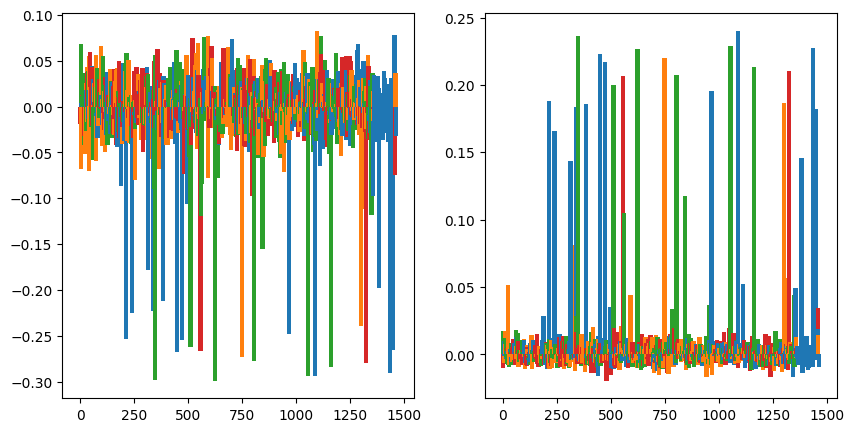

In [27]:
# Plot these loadings
# loadings of the X variables in the PLS2 model. 
# Loadings represent the contribution of each variable to the latent factors (components) extracted by PLS2. 
# focusing on the first two loadings ([:, 0] and [:, 1]), which are associated with the first and second components.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

bar_colors =[lookup[i]['color'] for i in range(0,len(pls2.x_loadings_))]

ax1.bar(range(0, len(pls2.x_loadings_)), pls2.x_loadings_[:,0], width=20, color=bar_colors)
ax2.bar(range(0, len(pls2.x_loadings_)), pls2.x_loadings_[:,1], width=20, color=bar_colors)

## Label plots: identify proteins with significant contributions

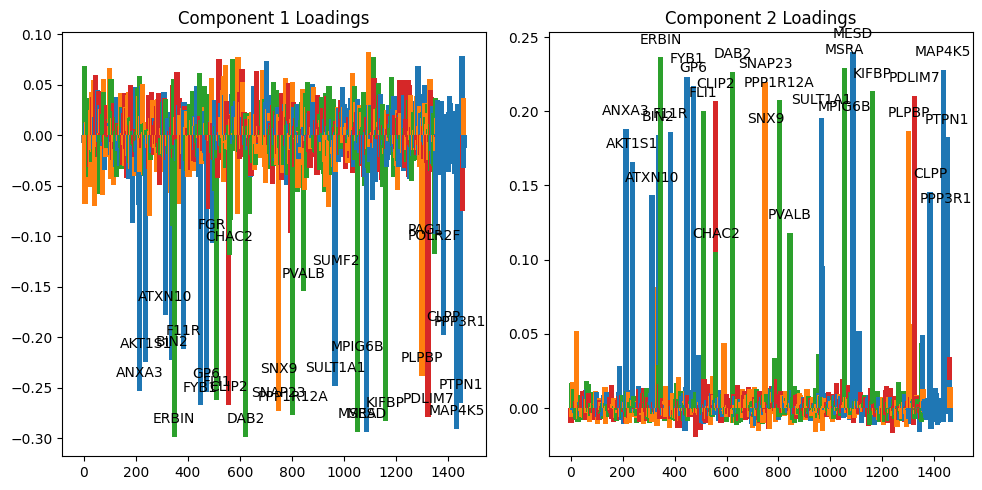

In [29]:
# Test code
import matplotlib.pyplot as plt

# Set your threshold value
threshold_value = 0.10  # Adjust this threshold as needed

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a list of bar colors based on values from the 'lookup' dictionary
bar_colors = [lookup[i]['color'] for i in range(len(pls2.x_loadings_))]

# Plot the first set of loadings
ax1.bar(range(len(pls2.x_loadings_)), pls2.x_loadings_[:, 0], width=20, color=bar_colors)
ax1.set_title('Component 1 Loadings')

# Plot the second set of loadings
ax2.bar(range(len(pls2.x_loadings_)), pls2.x_loadings_[:, 1], width=20, color=bar_colors)
ax2.set_title('Component 2 Loadings')

# Label the bars with protein names for those bars where the loading is greater than the threshold
for i, loading_value in enumerate(pls2.x_loadings_[:, 0]):
    if abs(loading_value) > threshold_value:
        ax1.annotate(proteins.columns[i], (i, loading_value), textcoords="offset points", xytext=(0, 10), ha='center')

for i, loading_value in enumerate(pls2.x_loadings_[:, 1]):
    if abs(loading_value) > threshold_value:
        ax2.annotate(proteins.columns[i], (i, loading_value), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust plot layout
plt.tight_layout()

# Show the plots
plt.show()
